In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [10]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('/content/XSSTraining.csv')

# Get the shape of the dataset (number of rows and columns)
print("Dataset Shape: ", df.shape)

# Get the first few rows of the dataset
print("\nDataset Head: \n", df.head())

# Get the summary statistics of the dataset
print("\nDataset Summary Statistics: \n", df.describe())

# Get the data types of each column in the dataset
print("\nDataset Data Types: \n", df.dtypes)

# Check for missing values in the dataset
print("\nMissing Values: \n", df.isnull().sum())

# Check for duplicated rows in the dataset
print("\nNumber of Duplicates: ", df.duplicated().sum())

Dataset Shape:  (19122, 66)

Dataset Head: 
    Contains &lt  ScripTag  Readable  Contains "><  Contains '><  Contains And  \
0             0         1         1             1             0             0   
1             0         1         1             1             0             0   
2             0         1         1             1             0             0   
3             0         1         0             0             0             1   
4             0         1         1             0             0             0   

   Contains Percentage  Contains Slash  Contains BackSlash  Contains Plus  \
0                    0               1                   0              0   
1                    0               1                   0              0   
2                    0               1                   0              0   
3                    1               1                   0              1   
4                    1               1                   0              0   

   ..

In [6]:
for column in df.columns:
    print(column, ":", df[column].dtype)

Contains &lt : int64
ScripTag : int64
Readable : int64
Contains ">< : int64
Contains '>< : int64
Contains And : int64
Contains Percentage : int64
Contains Slash : int64
Contains BackSlash : int64
Contains Plus : int64
Contains Document : int64
Contains Window : int64
Contains Onload : int64
Contains Onerror : int64
Contains DIV : int64
Contains iframe : int64
Contains img : int64
Contains SRC : int64
Containss Var : int64
Contains Eval : int64
Contains href : int64
Contains Cookie : int64
Contains StringfromCharCode : int64
Contains Single Quote : int64
Contains Question Mark : int64
Contains Exclamation Mark : int64
Contains Semicolon : int64
Contains HTTP : int64
Contains JS : int64
Contains Hash : int64
Contains Equal : int64
Contains Open Bracket : int64
Contains Close Bracket : int64
Contains Duble Bracket : int64
Contains Dollar : int64
Contains Open Parenthesis : int64
Contains Close Parenthesis : int64
Contains Asterisk : int64
Contains Comma : int64
Contains Hyphen : int64
Con

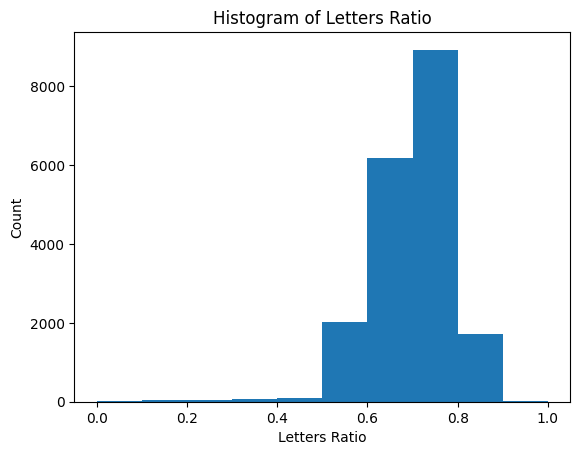

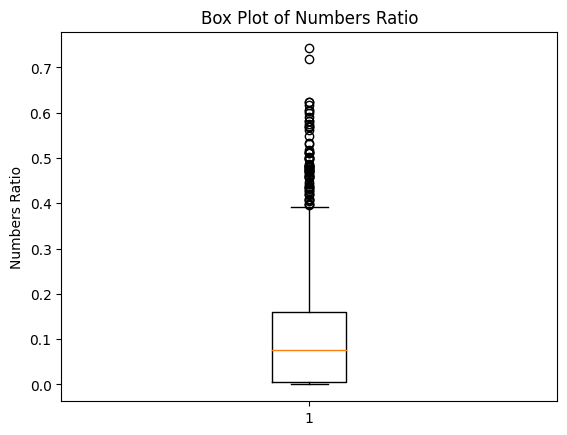

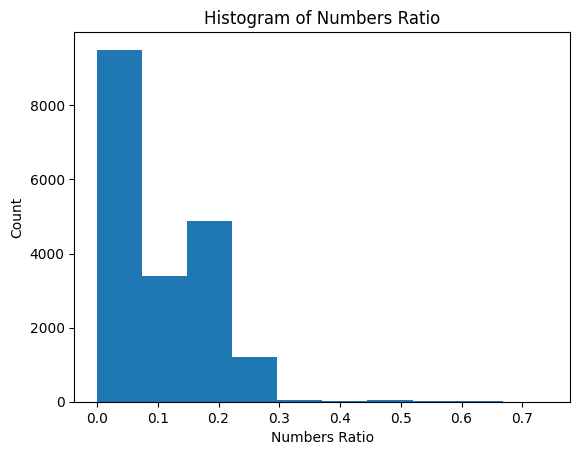

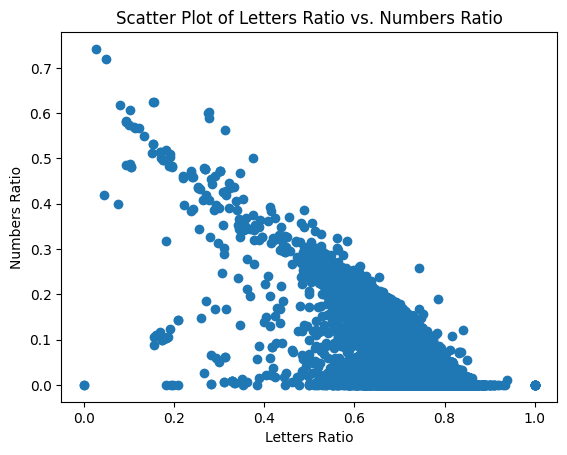

In [24]:

# Calculate summary statistics
summary_stats = df.describe()

# Plot histogram of a feature
plt.hist(df['Letters Ratio'])
plt.title("Histogram of Letters Ratio")
plt.xlabel("Letters Ratio")
plt.ylabel("Count")
plt.show()

# Plot box plot of a feature
plt.boxplot(df['Numbuers Ratio'])
plt.title("Box Plot of Numbers Ratio")
plt.ylabel("Numbers Ratio")
plt.show()

# Plot histogram of a feature
plt.hist(df['Numbuers Ratio'])
plt.title("Histogram of Numbers Ratio")
plt.xlabel("Numbers Ratio")
plt.ylabel("Count")
plt.show()

# Plot scatter plot of two features
plt.scatter(df['Letters Ratio'], df['Numbuers Ratio'])
plt.title("Scatter Plot of Letters Ratio vs. Numbers Ratio")
plt.xlabel("Letters Ratio")
plt.ylabel("Numbers Ratio")
plt.show()

<ipython-input-17-09ce315d9631>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean()


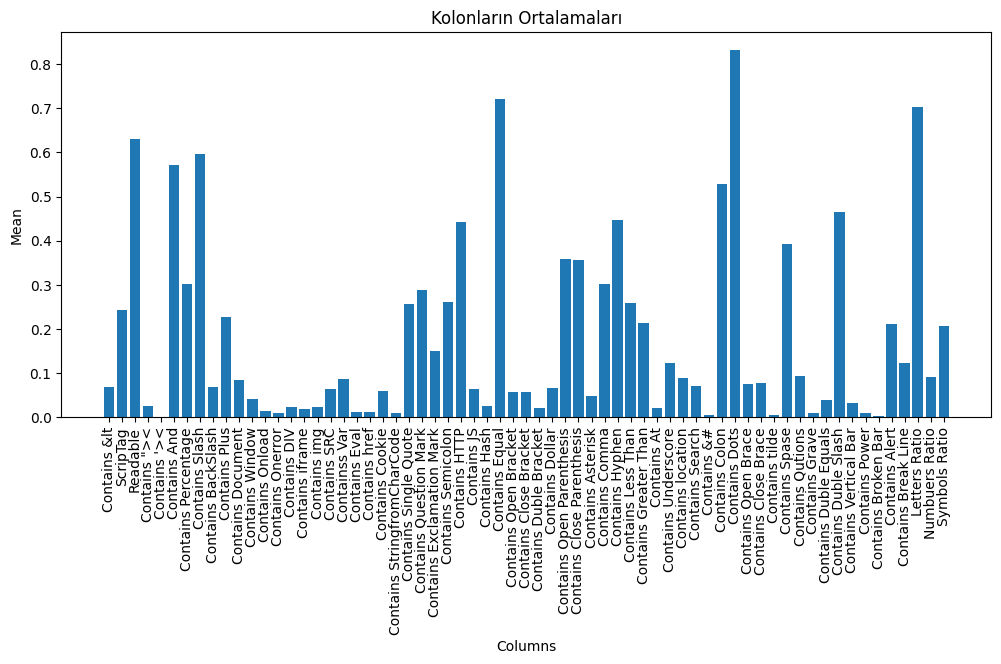

In [17]:
# calculate the mean of each column
means = df.mean()

# create a bar plot
plt.figure(figsize=(12, 5)) # set the size of the plot
plt.bar(means.index, means.values)
plt.xticks(rotation=90)
plt.title("Kolonların Ortalamaları")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.show()

In [23]:
# create a list to store the column names with outliers
outliers_columns = []

# Select only numerical columns
num_cols = df.select_dtypes(include=["float64"]).columns
print(num_cols)
# Create boxplots for each numerical column
'''for col in num_cols:
    sns.boxplot(x=df[col])'''

# loop through each column in the dataset
for col in num_cols:

    # calculate z-score for each data point in the column
    z = np.abs(stats.zscore(df[col]))

    # find the indices of the data points with z-score greater than 3
    outlier_indices = np.where(z > 3)[0]

    # if there are outliers in the column
    if len(outlier_indices) > 0:
        
        # add the column name to the list of columns with outliers
        outliers_columns.append(col)
        
        # print the number of outliers in the column
        print(f"{col}: {len(outlier_indices)} tane outlier.")

# remove the rows with outliers
df_without_outliers = df.drop(df.index[outlier_indices])

# print the list of columns with outliers
print(f"\nColumns with outliers: {outliers_columns}")

# print the updated shape of the dataset
print(f"\nUpdated shape of the dataset: {df_without_outliers.shape}")

Index(['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio'], dtype='object')
Letters Ratio: 199 tane outlier.
Numbuers Ratio: 89 tane outlier.
Symbols Ratio: 266 tane outlier.

Columns with outliers: ['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio']

Updated shape of the dataset: (18856, 66)


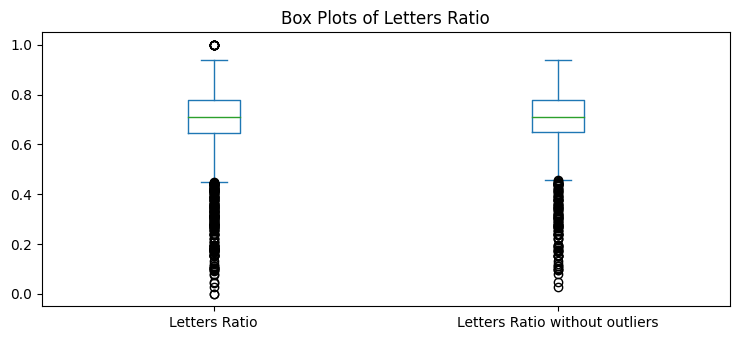

In [29]:
# Plot box plot of "Letters Ratio" feature
'''plt.boxplot(df['Letters Ratio'])
plt.title("Box Plot of Letters Ratio")
plt.ylabel("Letters Ratio")
plt.show()'''

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Letters Ratio": df['Letters Ratio'], "Letters Ratio without outliers": df_without_outliers['Letters Ratio']})

# Plot the dataframe
ax = data[['Letters Ratio', 'Letters Ratio without outliers']].plot(kind='box', title='Box Plots of Letters Ratio')

# Display the plot
plt.show()

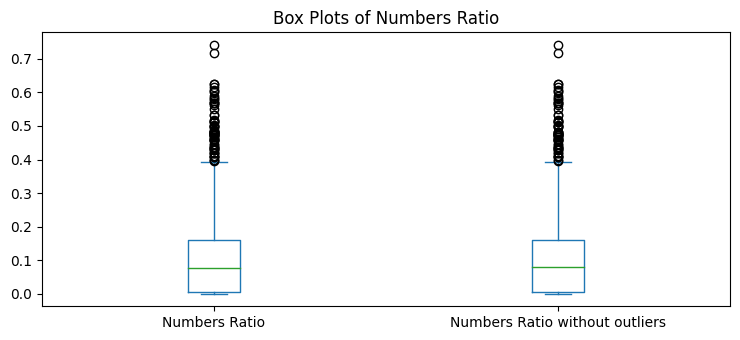

In [34]:
# Plot box plot of "Numbuers Ratio" feature

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Numbers Ratio": df['Numbuers Ratio'], "Numbers Ratio without outliers": df_without_outliers['Numbuers Ratio']})

# Plot the dataframe
ax = data[['Numbers Ratio', 'Numbers Ratio without outliers']].plot(kind='box', title='Box Plots of Numbers Ratio')

# Display the plot
plt.show()

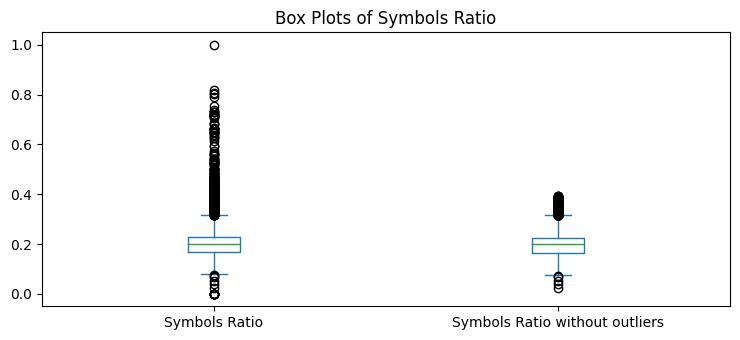

In [35]:
# Plot box plot of "Symbols Ratio" feature

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Symbols Ratio": df['Symbols Ratio'], "Symbols Ratio without outliers": df_without_outliers['Symbols Ratio']})

# Plot the dataframe
ax = data[['Symbols Ratio', 'Symbols Ratio without outliers']].plot(kind='box', title='Box Plots of Symbols Ratio')

# Display the plot
plt.show()

In [36]:
# Count the missing values in each column
null_columns = df_without_outliers.isna().sum()
print(f"Number of columns with missing values: {len(null_columns[null_columns > 0])}")

Number of columns with missing values: 0
